# Projet Covid

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy as sp

from datetime import datetime 

## Initialisation

![test](Images/table.png)


In [216]:
beta0 = np.random.uniform(0.7, 1.1)
f = np.random.uniform(0.1, 0.5)

E0 = np.exp(np.random.uniform(- np.log(10), 2 *np.log(10)))
print(E0)

d0 = datetime(2020, 2, 4)
d1 = datetime(2020, 3, 12)
d2 = datetime(2020, 3, 22)
d3 = datetime(2020, 5, 17)

t0 = (d0 - datetime(2020, 1, 1)).days
t1 = np.random.uniform(d1.timetuple().tm_yday, d2.timetuple().tm_yday) - t0

t2 = t1 + np.random.randint(4, 20) 

T_max = d3.timetuple().tm_yday - d0.timetuple().tm_yday

alpha = np.random.uniform(0.3, .7)
mu    = np.random.uniform(0.3, 0.7)

TE = np.random.uniform(2.5, 3.5)
TI = np.random.randint(4, 5)

gamma = np.exp(np.log(0.03) + np.random.uniform(-np.log(4), np.log(4)))
print(gamma)

beta = np.zeros(T_max) # initialisation de beta
beta[0] = beta0

for k in range(T_max):
    if k < t1:
        beta[k] = beta0
    if t1 <= k < t1 + t2 :
        beta[k] = beta0 * (1 - (1 - f) * (k - t1) / t2) 
    if k >= t1 + t2:
        beta[k] = beta0 * f

35.855527575056094
0.007913373977674922


In [217]:
print(t0)

34


In [218]:
N = 67 * 1e6

S = np.zeros(T_max)
E = np.zeros(T_max)
I = np.zeros(T_max)
A = np.zeros(T_max)
R = np.zeros(T_max)

E[0] = E0
S[0] = N - E[0] - I[0] - A[0] - R[0]

def contrainte(N, S, E, I, A, R):
    return N == S + E + I + A + R



## Question 1)

![test](Images/equations.png)

In [221]:
## Première approche Euler Explicite
## Attention méthode non stable
Erreur = np.zeros(T_max)
for t in range(T_max): 
    if t == 0:
        continue
    else:
        S[t] = round(S[t-1] - beta[t] * S[t-1] / N * (I[t-1] + mu * A[t-1]))
        E[t] = round(E[t-1] + beta[t] * S[t-1] / N * (I[t-1] + mu * A[t-1]) -  E[t-1] / TE)
        I[t] = round(I[t-1] + alpha * E[t-1] / TE - I[t-1] / TI)
        A[t] = round(A[t-1] + (1 - alpha) * E[t-1] / TE - A[t-1] / TI)
        R[t] = round(R[t-1] + (I[t] + A[t]) / TI)
        # R[t] = N - S[t] - E[t] - I[t] - A[t]
        if contrainte(N, S[t], E[t], I[t], A[t], R[t]):
            continue
        else:
            Erreur[t] = N - S[t] - E[t] - I[t] - A[t] - R[t]
            # print(S[t] + E[t] + I[t] + A[t] + R[t])
            # print("Erreur")
            # break

H = gamma * I / TI




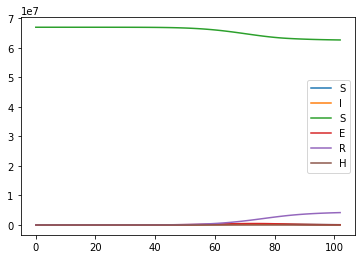

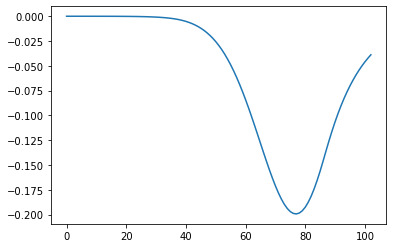

In [222]:
plt.plot(A, label = "S")

plt.plot(I, label = "I")

plt.plot(S, label = "S")
plt.plot(E, label = "E")
plt.plot(R, label = "R")
plt.plot(H, label = "H")

plt.legend()

plt.show()
# print(H)
plt.plot(Erreur/N * 100)

In [224]:
day_num = str(np.argmax(H) + t0) 
res = datetime.strptime('2020' + "-" + day_num, "%Y-%j").strftime("%d-%m-%Y") 
print('max Hospitalisation : ', np.max(H), 'le ', res)

print('Proportion finale de suceptible : ', S[-1] / N * 100)


max Hospitalisation :  425.4032016048596 le  20-04-2020
Proportion finale de suceptible :  93.5658552238806
